### NOTE: Search for "### FILL IN ###" to find areas of problem that you are expected to work on.

# **PART A: LINEAR REGRESSION [60 POINTS]**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import datasets

**Q1: Model fitting and prediction for Linear Regression [15 POINTS]**

The model parameters of Linear regression can be obtained by optimizing the RSS (residual sum of squares) w.r.t. $\beta$ : 

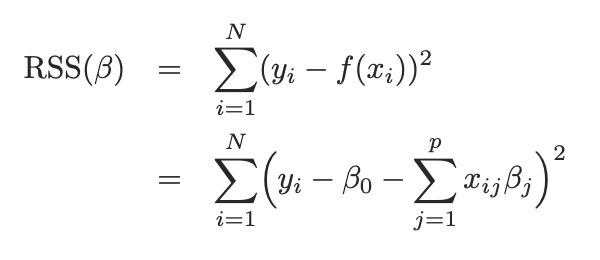


This optimization can be achieved by Gradient Ascent or by using the Closed Form solution directly. The Closed Form solution is as follows: 

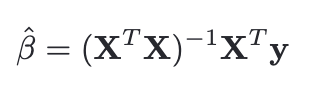

This implementation of Linear Regression adds a column of 1s to the input data matrix to account for the bias term, then computes the closed-form solution using the above equation, where $\beta$ is the vector of weights ($\beta_1 . . . . \beta_p$) and bias ($\beta_0$), and y is the vector of output values. The bias term is stored separately as the first element of beta, and the remaining elements correspond to the weights for the input features.

In [ ]:
class LinearRegression:
    def __init__(self):
        self.weights = None
        self.bias = None


    def fit(self, X, y):
        # modifying X to use (weights) and (bias) as a single (beta) term in the closed form solution
        # add a column of 1s to X for the bias term
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        
        ### FILL IN ### [5 POINTS]
        # compute the closed-form solution
        self.betas = 

        # extracting bias as beta_0 and remaining betas as the weights
        self.bias = self.betas[0]
        self.weights = self.betas[1:]
    

    def predict(self, X):
        # add a column of 1s to X for the bias term
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        
        ### FILL IN ### [5 POINTS]
        # make predictions using the learned weights and bias
        y_predicted = 

        return y_predicted


Using the LinearRegression class to fit a linear regression model on the Diabetes dataset, which is a commonly used dataset in machine learning for regression tasks. 

The dataset contains 442 samples (N=442), each with 10 input features (p=10) and an output variable.

In [ ]:
diabetes = datasets.load_diabetes()

In [ ]:
print(diabetes.feature_names)

In [ ]:
print(diabetes.DESCR)

In [ ]:
### looking at first 3 rows of dataset

print(diabetes.data[:3])
print("\n")
print(diabetes.target[:3])

In [ ]:
# load the diabetes dataset
X, y = diabetes.data, diabetes.target
print(X.shape)
print(y.shape)

This code loads the Diabetes dataset, splits it into train and test sets, creates an instance of the LinearRegression class, fits the model to the training data using the closed-form solution, makes predictions on the test data using the learned weights and bias.

**NOTE**: In this exercise we will use our test set as our validation set for finding the optimal value of lambda(as discussed in the class). Assume that the real testing dataset which we use to report the final model performance is unknown to us. In real life machine learning you do not have access to test data.

Here we evaluate the performance of the model using MSE (mean squared error), which is a common metric for regression tasks.

In [ ]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create an instance of the LinearRegression class
lr = LinearRegression()

# fit the model to the training data
lr.fit(X_train, y_train)

# make predictions on the testing data
y_pred = lr.predict(X_test)

# evaluate the performance of the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error (test): {mse}")

# also checking the error on training data
y_pred = lr.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
print(f"Mean squared error (train): {mse}")


"### FILL IN ###" [5 POINTS]

Report the training and testing errors.

Answer: 

**Q2: Model fitting and prediction for Ridge Regression [20 POINTS]**

In this implementation, we define a RidgeRegression class with a lambda parameter that controls the strength of regularization. In the fit method, we first add a bias term to the input data and then calculate the ridge regression coefficients using the closed-form solution:

$$ \widehat{\beta} = ({X}^T {X} + \lambda {I})^{-1} {X}^T {y}$$

where $X$ is the input data with the bias term added, $y$ is the output vector, and $\lambda$ is the regularization parameter.

In this exercise we do not split $\beta$ into <bias> and ```bias``` and ```weights``` as seen in earlier example. We consider ```betas``` as a single array of all model parameters $\beta_0 . . . . \beta_p$

In [ ]:
class RidgeRegression:
    def __init__(self, lambdaa=0.1):
        self.lambdaa = lambdaa
        self.betas = None
        
    def fit(self, X, y):
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        
        ### FILL IN ### [5 POINTS]
        # compute the closed-form solution
        self.betas = 
        
    def predict(self, X):
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1) 
        
        ### FILL IN ### [5 POINTS]
        # make predictions using the learned betas
        y_predicted = 

        return y_predicted

NOTE: Create an instance of the RidgeRegression class using above class with lambda taking values [0, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100].

You can use some code from Q1

In [ ]:
### FILL IN ### [5 POINTS]
# Report the train and test error for each value of 8 lambdas
# What interesting can you note from the errors as we increase the lambda value ?

lr = RidgeRegression(lambdaa=)



Answer: 

"### FILL IN ###" [5 POINTS]

Run the code found below for 8 different lambdas. 

Is there anything interesting that you can note about the model parameters ```betas``` by varying lambda ? 

Answer: 

In [ ]:
np.set_printoptions(suppress=True)
for i in [0, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]:
    lr = RidgeRegression(i)
    lr.fit(X_train, y_train)
    print(i, "\n",np.round(lr.betas,2))

**Q3: Model fitting and prediction for LASSO Regression [25 POINTS]**

In general, the LASSO lacks a closed form solution because the objective function is not differentiable.

This implementation uses scikit-learn's Lasso class, which applies L1 regularization to the model parameters. The alpha parameter is responsible for regularization.

In [ ]:
from sklearn.linear_model import Lasso

NOTE: Create an instance of the Lasso class using above imported library with lambda taking values [0.0001, 0.001, 0.01, 0.1, 1, 10, 100].

You can use some code from Q1

In [ ]:
### FILL IN ### [5 POINTS]
# Report the train and test error for each value of 7 lambdas
# What interesting can you note from the errors as we increase the lambda value ?

lr = Lasso()



Answer: 

"### FILL IN ###" [5 POINTS]

Run the code found below for 7 different lambdas. 

Is there anything interesting that you can note about the model parameters ```betas``` by varying lambda ? 

Answer: 

In [ ]:
### report the beta values
for i in [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]:
    lr = Lasso(i)
    lr.fit(X_train, y_train)
    print(i, "\n",np.round(lr.coef_,2))


"### FILL IN ###" [3 POINTS]

How do you decide whether your linear regression model fits the data?

Answer: 

<hr>

"### FILL IN ###" [3 POINTS]

In LASSO, what happens to the $i^{th}$ feature if its corresponding $\beta_i$ is zero ? 

Answer: 

<hr>

"### FILL IN ###" [3 POINTS]

In LASSO, what happens to overall model in terms of complexity as compared to unregularized Linear Regression ? 

Answer: 

<hr>

"### FILL IN ###" [3 POINTS]

What happens in Ridge regression when $\lambda$ is equal to zero ? 

Answer: 

<hr>

"### FILL IN ###" [3 POINTS]

Which regularization technique achieves both parameter selection and shrinkage ?

Answer: 

<hr>


# **PART B: NEURAL NETWORKS [40 POINTS]**


Hyperparameters in a neural network model are parameters that are set prior to the training of the model and are not learned during the training process. They affect the behavior and performance of the model. The process of selecting the optimal hyperparameters is called hyperparameter tuning and is an important part of building an effective machine learning model.



Here are some common hyperparameters in a neural network model:

* Learning rate: This hyperparameter controls the step size of the optimizer during training. 

* Number of hidden layers: The number of hidden layers in a neural network model is a hyperparameter that determines the depth of the network. 

* Number of neurons per layer: This hyperparameter determines the width of the neural network model. 

* Activation function: The activation function is applied to the output of each neuron in a neural network model. Different activation functions can have different properties, such as being more or less sensitive to input or output values. Popular activation functions include ReLU, sigmoid, and tanh.

**Q4: Neural Network on Iris Dataset [20 POINTS]**

In this example, we're normalizing the input features to have zero mean and unit variance, which can help with training. We're also one-hot encoding the target variable, which is a common technique for training classification models.

In [ ]:
iris = datasets.load_iris()

In [ ]:
### looking at first 3 rows of dataset

print(iris.data[:3])
print("\n")
print(iris.target[:3])

**NOTE**: In this exercise we will use our test set as our validation set for finding the optimal value of our hyperparameters(as discussed in the class). Assume that the real testing dataset which we use to report the final model performance is unknown to us. In real life machine learning you do not have access to test data.

In [ ]:
X = iris.data
y = iris.target

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# normalize input features
X_train = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
X_test = (X_test - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)

# one-hot encode target variable
y_train_onehot = np.zeros((len(y_train), 3))
y_train_onehot[np.arange(len(y_train)), y_train] = 1
y_test_onehot = np.zeros((len(y_test), 3))
y_test_onehot[np.arange(len(y_test)), y_test] = 1

In [ ]:
X.shape, y.shape

In [ ]:
X_train.shape, y_train_onehot.shape

In [ ]:
X_test.shape, y_test_onehot.shape

In this implementation, we define the NeuralNetwork class which takes four arguments as input: 
* input_size
* hidden_size
* output_size
* learning_rate

The forward() method performs forward propagation through the network

The backward() method performs backpropagation to compute gradients and update weights and biases

The train() method trains the network using the specified learning rate and number of epochs.

The sigmoid() method implements the sigmoid activation function, and the sigmoid_derivative() method implements the derivative of the sigmoid function, which is used in the backpropagation algorithm.

In [ ]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        
        ### FILL IN ### [5 POINTS]
        # Initialize weights and biases
        np.random.seed(42)
        self.W1 = 
        self.b1 = 
        np.random.seed(21)
        self.W2 = 
        self.b2 = 
    
    def sigmoid(self, z):
        ### FILL IN ### [5 POINTS]
        sigmoid_output = 
        return sigmoid_output
    
    def sigmoid_derivative(self, z):
        ### FILL IN ### [5 POINTS]
        sigmoid_derivative_output = 
        return sigmoid_derivative_output
    
    def forward(self, X):
        # Forward propagation
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        
        return self.a2
    
    def backward(self, X, y, output):
        # Backward propagation
        self.error = y - output
        self.delta2 = self.error * self.sigmoid_derivative(self.z2)
        self.dW2 = np.dot(self.a1.T, self.delta2)
        self.db2 = np.sum(self.delta2, axis=0, keepdims=True)
        self.delta1 = np.dot(self.delta2, self.W2.T) * self.sigmoid_derivative(self.z1)
        self.dW1 = np.dot(X.T, self.delta1)
        self.db1 = np.sum(self.delta1, axis=0)
        
        ### FILL IN ### [5 POINTS]
        # Update weights and biases using the derivatives
        self.W2 =
        self.b2 =
        self.W1 =
        self.b1 =
    
    def train(self, X, y, X_test, y_test, epochs):
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)
            loss = np.mean(np.square(y - output))

            # evaluate on test set
            test_output = self.forward(X_test)
            test_loss = np.mean(np.abs(y_test - test_output))
            #test_accuracy = np.mean(np.argmax(test_output, axis=1) == y_test)

            if epoch%10==0:
                print("Epoch %d - train_loss: %.4f , test_loss: %.4f" % (epoch, loss, test_loss))



To use this neural network, we can create an instance of the NeuralNetwork class and train it on a dataset:

In [ ]:
INPUT_SIZE = 4
HIDDEN_SIZE = 10
OUTPUT_SIZE = 3
LR = 0.001
EPOCHS = 500

nn = NeuralNetwork(input_size=INPUT_SIZE, hidden_size=HIDDEN_SIZE, output_size=OUTPUT_SIZE, learning_rate=LR)

In [ ]:
nn.train(X=X_train, y=y_train_onehot, X_test=X_test, y_test=y_test_onehot, epochs=EPOCHS)

**Q5: What if we vary the hyper parameters [20 POINTS]**

In [ ]:
### FILL IN ### [4 POINTS]
# Report both the losses after 500 epochs for each of the 7 different values of learning rate. 
# Is there anything interesting that you note when you increase the learning rate ?

INPUT_SIZE = 4
HIDDEN_SIZE = 10
OUTPUT_SIZE = 3
EPOCHS = 500


for lr in [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 5]:
    print("*"*30)
    print("PROCEDURE FOR LR = ", lr)
    nn = NeuralNetwork(input_size=INPUT_SIZE, hidden_size=HIDDEN_SIZE, output_size=OUTPUT_SIZE, learning_rate=lr)
    nn.train(X=X_train, y=y_train_onehot, X_test=X_test, y_test=y_test_onehot, epochs=EPOCHS)

Answer: 

"### FILL IN ###" [4 POINTS]

What happens when the learning rate is too high, also what if it is too low?

Answer: 

<hr>

"### FILL IN ###" [4 POINTS]

Which one of the seven learning rates (0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 5) is the most optimal ?

Answer: 


<hr>


"### FILL IN ###" [4 POINTS]

State one advantage and one disadvantage of increasing the number of hidden layers and number of units in each hidden layer?

Answer: 

<hr>


"### FILL IN ###" [4 POINTS]

Using the most optimal learning rate, run the process for 100,250,500,750,1000,2000 epochs and report errors

Answer: 



<hr>